In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


<h3> 1. Loading dataset

In [ ]:
import pandas as pd

data = pd.read_csv('gdrive/MyDrive/DataCaptonse/AO3EntireWork_v5_Word8k_MultiGenres.csv', index_col = False)
display(data)

,workid,worktitle,author,wordcount,content,genre,genres
0,1000184,Red Bandits and Spindled Cuddles,Questions3,1982,she knew it wasn't going to be easy once the ...,Romance,Romance
1,10002389,One Night Stand,Reapers-Carino (SweetKimchii),5282,"""are you at the club again, genji?"" ""yes anik...",Crime,Crime
2,1000461,John Winchester is Dead,monicawoe,1814,"""john winchester's dead,"" chris said. ""no, he...",Horror,Horror
3,1000696,Alibi,Strawberrywaltz,2083,tony's heart pounded painfully against the in...,Mystery,Mystery
4,10013702,The Legacy of the Sky Princess,MaloryArcher,6479,this is going to be the biggest moment of cla...,Action,Action
...,...,...,...,...,...,...,...
5798,9872612,(HunterxHunter) My Fairytale ~ Alluka in Wonde...,ShiaTOV,7954,she's running in the endless glum corridor. t...,Fantasy,"Adventure,Fantasy"
5799,99014,The Door in the Hill,Lindenharp,5332,by daylight there was nothing alien about see...,Adventure,"Adventure,Sci-Fi"
5800,9908345,An Unbelievable Adventure,storyplease,6513,"""harry, please. wake up. i need your help."" h...",Mystery,"Adventure,Mystery"
5801,9949997,Courting Blue's,pastelrainbow,2479,"""you can't seriously be planning on just sile...",Fantasy,"Fantasy,Romance"


In [ ]:
#Filter to get a smaller dataset
#data = data[data['wordcount'] < 1000]
#display(data)

In [ ]:
# Installing dependencies
#!pip install transformers
#!pip install datasets
#!pip install transformers[torch]
#!pip install evaluate
#!pip install torch
#!pip install accelerate

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW, BertTokenizer, BertForSequenceClassification, AutoTokenizer, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
from sklearn.preprocessing import MultiLabelBinarizer
from torch.optim.lr_scheduler import ReduceLROnPlateau
from imblearn.over_sampling import RandomOverSampler
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data['content'] = data['content'].str.replace(';',' ')
data['content'] = data['content'].str.replace('‘','\'')
data['content'] = data['content'].str.replace('"','')
data['content'] = data['content'].str.replace('  ',' ')
data['content'] = data['content'].str.replace(':',' ')
data['content'] = data['content'].str.replace('  ',' ')
data['content'] = data['content'].str.replace('  ',' ')
data['content'] = data['content'].str.replace('  ',' ')
data['content'] = data['content'].str.replace('  ',' ')
data['content'] = data['content'].str.replace('  ',' ')
data['content'] = data['content'].str.replace('  ',' ')
data['content'] = data['content'].str.replace('  ',' ')
data['content'] = data['content'].str.replace('  ',' ')
data['content'] = data['content'].str.lower()
display(data)

,workid,worktitle,author,wordcount,content,genre,genres
0,1000184,Red Bandits and Spindled Cuddles,Questions3,1982,she knew it wasn't going to be easy once the ...,Romance,Romance
1,10002389,One Night Stand,Reapers-Carino (SweetKimchii),5282,"are you at the club again, genji? yes aniki i...",Crime,Crime
2,1000461,John Winchester is Dead,monicawoe,1814,"john winchester's dead, chris said. no, he's ...",Horror,Horror
3,1000696,Alibi,Strawberrywaltz,2083,tony's heart pounded painfully against the in...,Mystery,Mystery
4,10013702,The Legacy of the Sky Princess,MaloryArcher,6479,this is going to be the biggest moment of cla...,Action,Action
...,...,...,...,...,...,...,...
5798,9872612,(HunterxHunter) My Fairytale ~ Alluka in Wonde...,ShiaTOV,7954,she's running in the endless glum corridor. t...,Fantasy,"Adventure,Fantasy"
5799,99014,The Door in the Hill,Lindenharp,5332,by daylight there was nothing alien about see...,Adventure,"Adventure,Sci-Fi"
5800,9908345,An Unbelievable Adventure,storyplease,6513,"harry, please. wake up. i need your help. har...",Mystery,"Adventure,Mystery"
5801,9949997,Courting Blue's,pastelrainbow,2479,you can't seriously be planning on just silen...,Fantasy,"Fantasy,Romance"


In [ ]:
data['genres'].value_counts()

,count
genres,
"Comedy,Romance",538
Romance,339
Fantasy,266
Crime,249
Sci-Fi,233
...,...
"Action,Adventure,Superheroes",1
"Horror,Mystery,Superheroes",1
"Crime,Horror,Superheroes",1


<h3> 2. Steaming and lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()

def simplify_input(content):
    content = re.sub("\\s", " ", content)
    content = re.sub("\\d", "", content)
    content = re.sub("[!?;:.,\'\"]", "", content) # please comment this out if punctuation is important for our task.
    content = content.lower().split()
    #tokens_without_sw = [word for word in content if word not in stopwords.words('english')]
    return content

def stemming(content):
    le_content = str("")
    for string in content:
        le_content += lemmatizer.lemmatize(string, pos="v") + " "
    le_2 = str("")
    for s in le_content.split():
        le_2 += lemmatizer.lemmatize(s, pos='a') + " "
    le_3 = str("")
    for s in le_2.split():
        le_3 += lemmatizer.lemmatize(s, pos='n') + " "
    return le_3

data['simplified_input'] = data['content'].map(lambda x: simplify_input(x))
data['lemmatized_output'] = data['simplified_input'].map(lambda x: stemming(x))

In [ ]:
print(data['lemmatized_output'])
print('==========================')
print(data['content'])

0       she know it wasnt go to be easy once the compa...
1       be you at the club again genji yes aniki i be ...
2       john winchester dead chris say no he not why w...
3       tonys heart pound painfully against the inside...
4       this be go to be the big moment of clarkes lif...
                              ...                        
5798    shes run in the endless glum corridor the humi...
5799    by daylight there be nothing alien about seeli...
5800    harry please wake up i need your help harry fi...
5801    you cant seriously be plan on just silently pi...
5802    most people be terrify of merlin bos and he co...
Name: lemmatized_output, Length: 5803, dtype: object
0        she knew it wasn't going to be easy once the ...
1        are you at the club again, genji? yes aniki i...
2        john winchester's dead, chris said. no, he's ...
3        tony's heart pounded painfully against the in...
4        this is going to be the biggest moment of cla...
                   

In [ ]:
# Preprocessing: Split genres into lists for multi-label encoding
data['genres_list'] = data['genres'].apply(lambda x: x.split(','))

# Multi-Label Binarization
mlb = MultiLabelBinarizer()
encoded_labels = mlb.fit_transform(data['genres_list'])

In [ ]:
display(data)

,workid,worktitle,author,wordcount,content,genre,genres,simplified_input,lemmatized_output,genres_list
0,1000184,Red Bandits and Spindled Cuddles,Questions3,1982,she knew it wasn't going to be easy once the ...,Romance,Romance,"[she, knew, it, wasnt, going, to, be, easy, on...",she know it wasnt go to be easy once the compa...,[Romance]
1,10002389,One Night Stand,Reapers-Carino (SweetKimchii),5282,"are you at the club again, genji? yes aniki i...",Crime,Crime,"[are, you, at, the, club, again, genji, yes, a...",be you at the club again genji yes aniki i be ...,[Crime]
2,1000461,John Winchester is Dead,monicawoe,1814,"john winchester's dead, chris said. no, he's ...",Horror,Horror,"[john, winchesters, dead, chris, said, no, hes...",john winchester dead chris say no he not why w...,[Horror]
3,1000696,Alibi,Strawberrywaltz,2083,tony's heart pounded painfully against the in...,Mystery,Mystery,"[tonys, heart, pounded, painfully, against, th...",tonys heart pound painfully against the inside...,[Mystery]
4,10013702,The Legacy of the Sky Princess,MaloryArcher,6479,this is going to be the biggest moment of cla...,Action,Action,"[this, is, going, to, be, the, biggest, moment...",this be go to be the big moment of clarkes lif...,[Action]
...,...,...,...,...,...,...,...,...,...,...
5798,9872612,(HunterxHunter) My Fairytale ~ Alluka in Wonde...,ShiaTOV,7954,she's running in the endless glum corridor. t...,Fantasy,"Adventure,Fantasy","[shes, running, in, the, endless, glum, corrid...",shes run in the endless glum corridor the humi...,"[Adventure, Fantasy]"
5799,99014,The Door in the Hill,Lindenharp,5332,by daylight there was nothing alien about see...,Adventure,"Adventure,Sci-Fi","[by, daylight, there, was, nothing, alien, abo...",by daylight there be nothing alien about seeli...,"[Adventure, Sci-Fi]"
5800,9908345,An Unbelievable Adventure,storyplease,6513,"harry, please. wake up. i need your help. har...",Mystery,"Adventure,Mystery","[harry, please, wake, up, i, need, your, help,...",harry please wake up i need your help harry fi...,"[Adventure, Mystery]"
5801,9949997,Courting Blue's,pastelrainbow,2479,you can't seriously be planning on just silen...,Fantasy,"Fantasy,Romance","[you, cant, seriously, be, planning, on, just,...",you cant seriously be plan on just silently pi...,"[Fantasy, Romance]"


In [ ]:
# Combine content and encoded labels into a DataFrame for oversampling
#data_balanced = pd.DataFrame({
#   'content': data['lemmatized_output'],
#    'labels': list(encoded_labels)  # Convert multi-hot encoded labels back to list
#})

#X = data_balanced['content']
#y = encoded_labels

#oversampler = RandomOverSampler(random_state=42)
#X_resampled, y_resampled = [], []

#for i in range(y.shape[1]):  # Iterate over each label (column)
    # Oversample the dataset for each label
#    oversampled_X, oversampled_y = oversampler.fit_resample(X.to_frame(), y[:, i])
#   X_resampled.extend(oversampled_X['content'].tolist())
#    y_resampled.extend([[1 if j == i else 0 for j in range(y.shape[1])] for _ in range(len(oversampled_X))])

# Convert to DataFrame after resampling
#balanced_data = pd.DataFrame({'content': X_resampled, 'encoded_labels': y_resampled})

# Split into training and testing sets
#train_texts, test_texts, train_labels, test_labels = train_test_split(
#    balanced_data['content'], list(balanced_data['encoded_labels']), test_size=0.2, random_state=42
#)
train_texts, test_texts, train_labels, test_labels = train_test_split(data['lemmatized_output'], encoded_labels, test_size=0.2, random_state=42)
print('This is train_texts')
print(train_texts)
print('=============================================================')
print('This is test_texts')
print(test_texts)
print('=============================================================')
print('This is train_labels')
print(train_labels)
print('=============================================================')
print('This is test_labels')
print(test_labels)

#Convert labels to NumPy arrays for compatibility with PyTorch
#train_labels = np.array(train_labels)
#test_labels = np.array(test_labels)

#Print the distribution of classes after balancing
#print("Class distribution after balancing:")
#print(np.sum(train_labels, axis=0))

This is train_texts
3071    warmth author note write this seventeen year a...
2860    keith always have a plan it might not be entir...
4694    cycle and talk on his cell phone at the same t...
5696    they werent stupid whoever they be they come i...
3107    for year he chase her for year they fight toge...
                              ...                        
3772    the sea be calm the wind blow the water lightl...
5191    [click] (knocking) [grian] hi hey can you help...
5226    paimon ✓ • @genshinimpact #tartagliarerunwhen ...
5390    the sea floor open up into a giant chasm it ri...
860     if there be one thing that adrien agreste know...
Name: lemmatized_output, Length: 4642, dtype: object
This is test_texts
3739    the mansion didnt want him the mansion didnt w...
1103    over the year professor taylor caboose have ma...
812     white it the first thing genji see when he ope...
1632    satori saturday schedule be fairly forgive he ...
1128    in the span of the past three 

<h3> 3. Tokenize the Text with BERT Tokenizer and define the DistilBERT model with CUDA

In [ ]:
# Tokenization
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
max_length = 512

train_encodings = tokenizer(
    train_texts.tolist(),
    truncation=True,
    padding='max_length',
    max_length=max_length,
    return_tensors='pt'
)
test_encodings = tokenizer(
    test_texts.tolist(),
    truncation=True,
    padding='max_length',
    max_length=max_length,
    return_tensors='pt'
)

# Convert labels to PyTorch tensors
train_labels = torch.tensor(train_labels, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.float32)

<ipython-input-25-990684e97846>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels = torch.tensor(train_labels, dtype=torch.float32)
<ipython-input-25-990684e97846>:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_labels = torch.tensor(test_labels, dtype=torch.float32)


In [ ]:
# Load the model
num_labels = len(mlb.classes_)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_labels)
model.to(device)

# Optimizer and Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)
criterion = torch.nn.BCEWithLogitsLoss()

# Create DataLoader
batch_size = 8
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels)
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_labels)

train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=batch_size)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


<h3>4. Model training & validation

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, hamming_loss, classification_report

# Initialize lists to store metrics
training_losses = []
validation_losses = []
validation_accuracies = []
hamming_losses = []
label_based_accuracies = []
best_model_epoch = -1
best_model_loss = float('inf')
best_model_accuracy = 0
best_model_hamming = 0
best_model_label_accuracy = 0
best_model_validation_loss = 0

# Parameters for early stopping and fine-tuning
patience = 5  # Number of epochs to wait for improvement
best_val_loss = float('inf')  # Best validation loss seen so far
epochs_no_improve = 0  # Counter for epochs without improvement

# Learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

# Training loop
epochs = 15
for epoch in range(epochs):
    model.train()
    total_loss = 0

    # Training phase
    for batch in train_dataloader:
        b_input_ids, b_attention_mask, b_labels = (t.to(device) for t in batch)
        optimizer.zero_grad()
        outputs = model(b_input_ids, attention_mask=b_attention_mask)
        loss = criterion(outputs.logits, b_labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_dataloader)
    training_losses.append(avg_train_loss)
    print(f"Epoch {epoch + 1}: Training Loss = {avg_train_loss:.4f}")

    # Validation phase
    model.eval()
    val_loss = 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in test_dataloader:
            b_input_ids, b_attention_mask, b_labels = (t.to(device) for t in batch)
            outputs = model(b_input_ids, attention_mask=b_attention_mask)
            loss = criterion(outputs.logits, b_labels)
            val_loss += loss.item()

            # Store predictions and true labels
            preds = torch.sigmoid(outputs.logits).cpu().numpy()
            preds = (preds > 0.3).astype(int)  # Apply threshold for multi-label classification
            all_preds.extend(preds)
            all_labels.extend(b_labels.cpu().numpy())

    avg_val_loss = val_loss / len(test_dataloader)
    validation_losses.append(avg_val_loss)

    # Calculate metrics
    val_accuracy = accuracy_score(all_labels, all_preds)
    hamming = hamming_loss(all_labels, all_preds)

    # Label-based accuracy
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)
    label_correct = (all_preds == all_labels).sum(axis=0)
    label_total = all_labels.shape[0]
    label_accuracy = label_correct / label_total
    avg_label_accuracy = label_accuracy.mean()
    label_based_accuracies.append(avg_label_accuracy)

    validation_accuracies.append(val_accuracy)
    hamming_losses.append(hamming)

    print(f"Epoch {epoch + 1}: Validation Loss = {avg_val_loss:.4f}, Validation Accuracy = {val_accuracy:.4f}, "
          f"Hamming Loss = {hamming:.4f}, Label-Based Accuracy = {avg_label_accuracy:.4f}")

    # Early stopping and learning rate adjustment
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
        best_model_epoch = epoch + 1
        best_model_accuracy = val_accuracy
        best_model_hamming = hamming
        best_model_label_accuracy = avg_label_accuracy
        best_model_validation_loss = avg_val_loss
        print("Validation loss improved. Saving model...")
        torch.save(model.state_dict(), "best_model.pth")
    else:
        epochs_no_improve += 1
        print(f"No improvement in validation loss for {epochs_no_improve} epoch(s).")
        scheduler.step(avg_val_loss)

    if epochs_no_improve >= patience:
        print(f"Early stopping triggered at epoch {epoch + 1}.")
        break

Epoch 1: Training Loss = 0.4547
Epoch 1: Validation Loss = 0.4184, Validation Accuracy = 0.1163, Hamming Loss = 0.2035, Label-Based Accuracy = 0.7965
Validation loss improved. Saving model...
Epoch 2: Training Loss = 0.3968
Epoch 2: Validation Loss = 0.3942, Validation Accuracy = 0.1464, Hamming Loss = 0.1926, Label-Based Accuracy = 0.8074
Validation loss improved. Saving model...
Epoch 3: Training Loss = 0.3483
Epoch 3: Validation Loss = 0.3875, Validation Accuracy = 0.1456, Hamming Loss = 0.1939, Label-Based Accuracy = 0.8061
Validation loss improved. Saving model...
Epoch 4: Training Loss = 0.2959
Epoch 4: Validation Loss = 0.3982, Validation Accuracy = 0.1662, Hamming Loss = 0.1854, Label-Based Accuracy = 0.8146
No improvement in validation loss for 1 epoch(s).
Epoch 5: Training Loss = 0.2387
Epoch 5: Validation Loss = 0.4236, Validation Accuracy = 0.1585, Hamming Loss = 0.1896, Label-Based Accuracy = 0.8104
No improvement in validation loss for 2 epoch(s).
Epoch 6: Training Loss =

Expectation:
1. Training and Validation Loss: Line graph comparing loss during training and validation.
2. Validation Accuracy: Should show improvement in accuracy across epochs.
3. Hamming Loss: Should decrease over epochs.
4. Label-Based Accuracy: Should increase as the model learns

<h3>5. Classification report & plot charts


Detailed Classification Report:
              precision    recall  f1-score   support

      Action       0.46      0.33      0.38       194
   Adventure       0.45      0.47      0.46       179
      Comedy       0.49      0.54      0.52       282
       Crime       0.56      0.52      0.54       204
     Fantasy       0.59      0.56      0.58       266
      Horror       0.49      0.41      0.45       199
     Mystery       0.39      0.48      0.43       152
     Romance       0.58      0.62      0.60       479
      Sci-Fi       0.67      0.59      0.63       187
 Superheroes       0.67      0.45      0.54       125

   micro avg       0.53      0.52      0.53      2267
   macro avg       0.53      0.50      0.51      2267
weighted avg       0.54      0.52      0.53      2267
 samples avg       0.54      0.53      0.50      2267



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


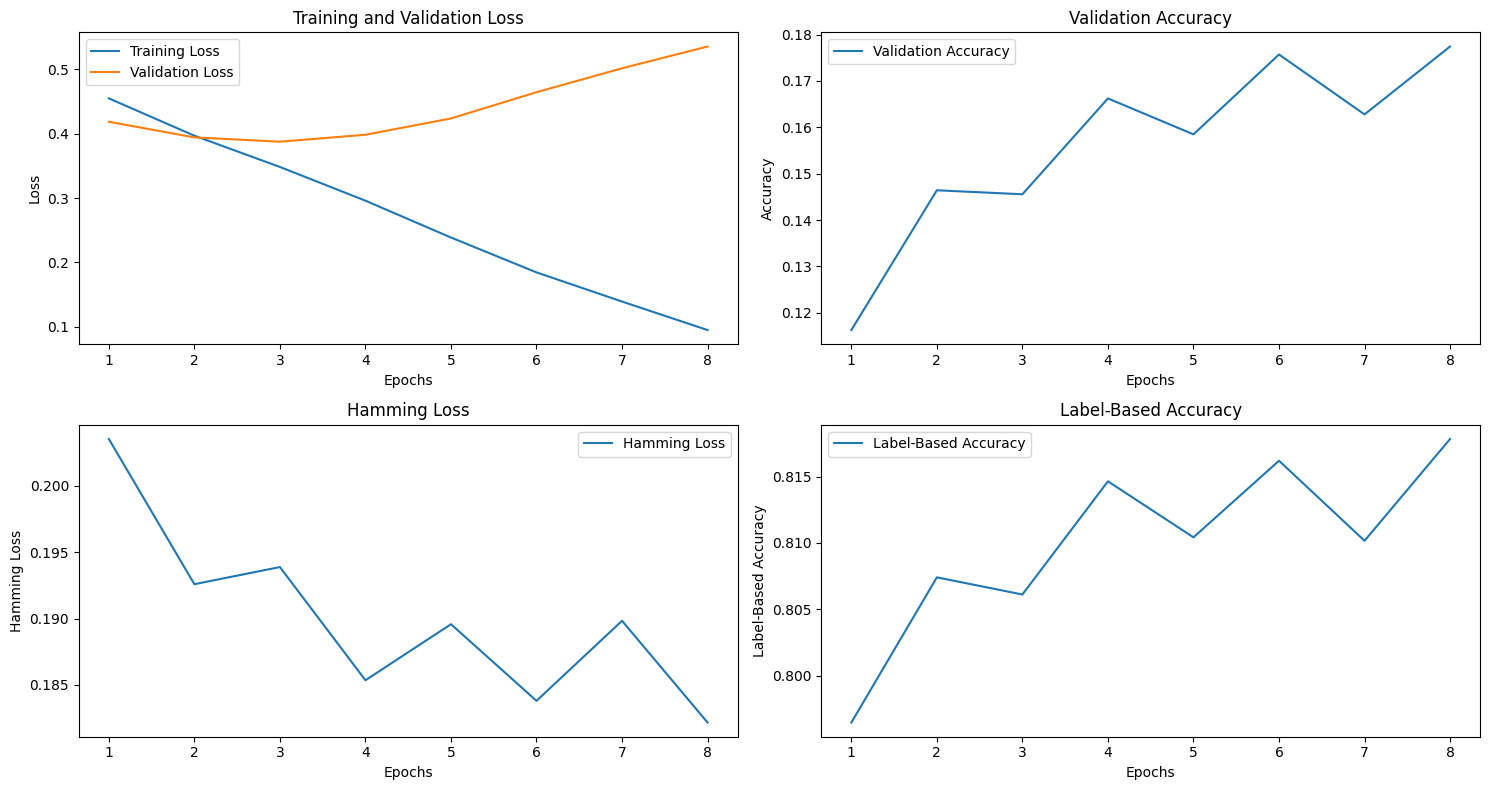

In [ ]:
# Detailed Classification Report
print("\nDetailed Classification Report:")
print(classification_report(all_labels, all_preds, target_names=mlb.classes_))

# Plot Training and Validation Metrics
plt.figure(figsize=(15, 8))

# Training and Validation Loss
plt.subplot(2, 2, 1)
plt.plot(range(1, len(training_losses) + 1), training_losses, label='Training Loss')
plt.plot(range(1, len(validation_losses) + 1), validation_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Validation Accuracy
plt.subplot(2, 2, 2)
plt.plot(range(1, len(validation_accuracies) + 1), validation_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Hamming Loss
plt.subplot(2, 2, 3)
plt.plot(range(1, len(hamming_losses) + 1), hamming_losses, label='Hamming Loss')
plt.title('Hamming Loss')
plt.xlabel('Epochs')
plt.ylabel('Hamming Loss')
plt.legend()

# Label-Based Accuracy
plt.subplot(2, 2, 4)
plt.plot(range(1, len(label_based_accuracies) + 1), label_based_accuracies, label='Label-Based Accuracy')
plt.title('Label-Based Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Label-Based Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

<h3>6. Best DistilBert Model

In [ ]:
# Display Best Model Information
print("\nBest Model Information:")
print(f"Best Epoch: {best_model_epoch}")
print(f"Best Validation Loss: {best_model_validation_loss:.4f}")
print(f"Best Validation Accuracy: {best_model_accuracy:.4f}")
print(f"Best Hamming Loss: {best_model_hamming:.4f}")
print(f"Best Label-Based Accuracy: {best_model_label_accuracy:.4f}")


Best Model Information:
Best Epoch: 3
Best Validation Loss: 0.3875
Best Validation Accuracy: 0.1456
Best Hamming Loss: 0.1939
Best Label-Based Accuracy: 0.8061


<h3>7. Test cases

In [ ]:
rand_texts = data['lemmatized_output'][5798]
new_encodings = tokenizer(
    rand_texts,
    truncation=True,
    padding='max_length',
    max_length=max_length,
    return_tensors='pt'
)
new_encodings = {key: tensor.to(device) for key, tensor in new_encodings.items()}

with torch.no_grad():
    outputs = model(**new_encodings)
    preds = torch.sigmoid(outputs.logits) > 0.3  # Multi-label threshold
    predicted_genres = [mlb.classes_[i] for i, p in enumerate(preds[0]) if p]

print("\nPredicted Genres:")
print(predicted_genres)


Predicted Genres:
['Adventure', 'Fantasy']


In [ ]:
data['genres_list'][5798]

['Adventure', 'Fantasy']

In [ ]:
# New data
new_texts = ["A hero battles villains to save the day while finding love."]
new_encodings_1 = tokenizer(
    new_texts,
    truncation=True,
    padding='max_length',
    max_length=max_length,
    return_tensors='pt'
)
new_encodings_1 = {key: tensor.to(device) for key, tensor in new_encodings_1.items()}

with torch.no_grad():
    outputs = model(**new_encodings)
    preds = torch.sigmoid(outputs.logits) > 0.3  # Multi-label threshold
    predicted_genres = [mlb.classes_[i] for i, p in enumerate(preds[0]) if p]

print("\nPredicted Genres:")
print(predicted_genres)


Predicted Genres:
['Adventure', 'Fantasy']
